In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/Dekhsa/data-science/refs/heads/main/datasets/indonesia-corruption-datasets/indonesia_corruption_data.csv')
df

,Case_ID,Year,Province,Amount_Lost_IDR,Defendants,Verdict
0,1,2006,Sumatra,7.545693e+09,4.0,Guilty
1,2,2019,Sumatra,1.112058e+09,7.0,Not Guilty
2,3,2014,Kalimantan,9.420434e+09,4.0,Guilty
3,4,2010,Sulawesi,5.697989e+09,2.0,Not Guilty
4,5,2007,East Java,2.405513e+09,4.0,Guilty
...,...,...,...,...,...,...
995,996,2024,Bali,0.000000e+00,0.0,Guilty
996,997,2000,Sumatra,0.000000e+00,0.0,Not Guilty
997,998,2020,Kalimantan,0.000000e+00,0.0,Ongoing
998,999,2021,Kalimantan,0.000000e+00,0.0,Guilty


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Case_ID          1000 non-null   int64  
 1   Year             1000 non-null   int64  
 2   Province         950 non-null    object 
 3   Amount_Lost_IDR  945 non-null    float64
 4   Defendants       945 non-null    float64
 5   Verdict          1000 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 47.0+ KB


In [9]:
df.describe()

,Case_ID,Year,Amount_Lost_IDR,Defendants
count,1000.000000,1000.000000,9.450000e+02,945.000000
mean,500.500000,2011.991000,5.421281e+09,4.996825
std,288.819436,7.443946,7.455550e+09,2.607638
min,1.000000,2000.000000,0.000000e+00,0.000000
25%,250.750000,2005.000000,2.512142e+09,3.000000
50%,500.500000,2012.000000,4.990119e+09,5.000000
75%,750.250000,2018.250000,7.461773e+09,7.000000
max,1000.000000,2024.000000,9.965581e+10,9.000000


In [12]:
uniqueProvinces = df['Province'].unique()
print(uniqueProvinces)

['Sumatra' 'Kalimantan' 'Sulawesi' 'East Java' 'Central Java' 'Jakarta'
 'Bali' 'West Java' nan]


In [13]:
uniqueVerdict = df['Verdict'].unique()
print(uniqueVerdict)

['Guilty' 'Not Guilty' 'Ongoing']


In [15]:
df_copy = df.copy()
df_copy

,Case_ID,Year,Province,Amount_Lost_IDR,Defendants,Verdict
0,1,2006,Sumatra,7.545693e+09,4.0,Guilty
1,2,2019,Sumatra,1.112058e+09,7.0,Not Guilty
2,3,2014,Kalimantan,9.420434e+09,4.0,Guilty
3,4,2010,Sulawesi,5.697989e+09,2.0,Not Guilty
4,5,2007,East Java,2.405513e+09,4.0,Guilty
...,...,...,...,...,...,...
995,996,2024,Bali,0.000000e+00,0.0,Guilty
996,997,2000,Sumatra,0.000000e+00,0.0,Not Guilty
997,998,2020,Kalimantan,0.000000e+00,0.0,Ongoing
998,999,2021,Kalimantan,0.000000e+00,0.0,Guilty


In [20]:
zeroValRows = df[(df == 0).any(axis=1)]
zeroValRows

,Case_ID,Year,Province,Amount_Lost_IDR,Defendants,Verdict
995,996,2024,Bali,0.0,0.0,Guilty
996,997,2000,Sumatra,0.0,0.0,Not Guilty
997,998,2020,Kalimantan,0.0,0.0,Ongoing
998,999,2021,Kalimantan,0.0,0.0,Guilty
999,1000,2020,West Java,0.0,0.0,Ongoing


In [22]:
df_copy['Amount_Lost_IDR'] = df_copy['Amount_Lost_IDR'].replace(0, np.nan)
df_copy['Defendants'] = df_copy['Defendants'].replace(0, np.nan)

In [24]:
zeroValRows = df_copy[(df_copy == 0).any(axis=1)]
zeroValRows

,Case_ID,Year,Province,Amount_Lost_IDR,Defendants,Verdict


In [26]:
mv = df_copy[df_copy.isnull().any(axis=1)]
print(mv)

     Case_ID  Year      Province  Amount_Lost_IDR  Defendants     Verdict
59        60  2007           NaN              NaN         NaN      Guilty
76        77  2001           NaN              NaN         NaN  Not Guilty
96        97  2008           NaN              NaN         NaN      Guilty
101      102  2006           NaN              NaN         NaN      Guilty
136      137  2002           NaN              NaN         NaN      Guilty
139      140  2013           NaN              NaN         NaN     Ongoing
174      175  2011           NaN              NaN         NaN     Ongoing
198      199  2014           NaN              NaN         NaN      Guilty
210      211  2016           NaN              NaN         NaN  Not Guilty
235      236  2023           NaN              NaN         NaN      Guilty
277      278  2001           NaN              NaN         NaN      Guilty
280      281  2011           NaN              NaN         NaN     Ongoing
299      300  2016           NaN      

In [27]:
df_copy['Defendants'].fillna(df_copy['Defendants'].median(), inplace=True)
df_copy['Amount_Lost_IDR'].fillna(df_copy['Amount_Lost_IDR'].median(), inplace=True)

C:\Users\apits\AppData\Local\Temp\ipykernel_14948\2344841789.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['Defendants'].fillna(df_copy['Defendants'].median(), inplace=True)
C:\Users\apits\AppData\Local\Temp\ipykernel_14948\2344841789.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [28]:
from sklearn.impute import SimpleImputer

In [29]:
df_filled = SimpleImputer(strategy='most_frequent').fit_transform(df_copy)
df_filled = pd.DataFrame(df_filled, columns=df_copy.columns)
df_filled

,Case_ID,Year,Province,Amount_Lost_IDR,Defendants,Verdict
0,1,2006,Sumatra,7545693324.0,4.0,Guilty
1,2,2019,Sumatra,1112057931.0,7.0,Not Guilty
2,3,2014,Kalimantan,9420433921.0,4.0,Guilty
3,4,2010,Sulawesi,5697988826.0,2.0,Not Guilty
4,5,2007,East Java,2405513000.0,4.0,Guilty
...,...,...,...,...,...,...
995,996,2024,Bali,5005706455.0,5.0,Guilty
996,997,2000,Sumatra,5005706455.0,5.0,Not Guilty
997,998,2020,Kalimantan,5005706455.0,5.0,Ongoing
998,999,2021,Kalimantan,5005706455.0,5.0,Guilty


In [30]:
df_filled[df_filled.isnull().any(axis=1)]

,Case_ID,Year,Province,Amount_Lost_IDR,Defendants,Verdict


In [31]:
for col in df_filled.columns:
  print(f"Inconsistency on '{col}' : ")
  print(df_filled[col].apply(type).value_counts())
  print("-" * 20)
  
for col in ['Province', 'Verdict']:
  print(f"Unique value and its count in column '{col}' : ")
  print(df_filled[col].value_counts(dropna=False))
  print("-" * 20)

Inconsistency on 'Case_ID' : 
Case_ID
<class 'int'>    1000
Name: count, dtype: int64
--------------------
Inconsistency on 'Year' : 
Year
<class 'int'>    1000
Name: count, dtype: int64
--------------------
Inconsistency on 'Province' : 
Province
<class 'str'>    1000
Name: count, dtype: int64
--------------------
Inconsistency on 'Amount_Lost_IDR' : 
Amount_Lost_IDR
<class 'float'>    1000
Name: count, dtype: int64
--------------------
Inconsistency on 'Defendants' : 
Defendants
<class 'float'>    1000
Name: count, dtype: int64
--------------------
Inconsistency on 'Verdict' : 
Verdict
<class 'str'>    1000
Name: count, dtype: int64
--------------------
Unique value and its count in column 'Province' : 
Province
Central Java    181
Sumatra         123
Jakarta         121
Kalimantan      121
Bali            121
West Java       117
Sulawesi        115
East Java       101
Name: count, dtype: int64
--------------------
Unique value and its count in column 'Verdict' : 
Verdict
Ongoing    

In [32]:
uniqueProvinces = df_filled['Province'].unique()
print(uniqueProvinces)

uniqueVerdict = df_filled['Verdict'].unique()
print(uniqueVerdict)

['Sumatra' 'Kalimantan' 'Sulawesi' 'East Java' 'Central Java' 'Jakarta'
 'Bali' 'West Java']
['Guilty' 'Not Guilty' 'Ongoing']


In [34]:
duplicated = df_filled[df_filled.duplicated()]
duplicated

,Case_ID,Year,Province,Amount_Lost_IDR,Defendants,Verdict


In [35]:
df_clean = df_filled.drop_duplicates()
df_clean

,Case_ID,Year,Province,Amount_Lost_IDR,Defendants,Verdict
0,1,2006,Sumatra,7545693324.0,4.0,Guilty
1,2,2019,Sumatra,1112057931.0,7.0,Not Guilty
2,3,2014,Kalimantan,9420433921.0,4.0,Guilty
3,4,2010,Sulawesi,5697988826.0,2.0,Not Guilty
4,5,2007,East Java,2405513000.0,4.0,Guilty
...,...,...,...,...,...,...
995,996,2024,Bali,5005706455.0,5.0,Guilty
996,997,2000,Sumatra,5005706455.0,5.0,Not Guilty
997,998,2020,Kalimantan,5005706455.0,5.0,Ongoing
998,999,2021,Kalimantan,5005706455.0,5.0,Guilty


In [36]:
df_clean.loc[df_clean.duplicated()]

,Case_ID,Year,Province,Amount_Lost_IDR,Defendants,Verdict


<Axes: xlabel='Amount_Lost_IDR'>

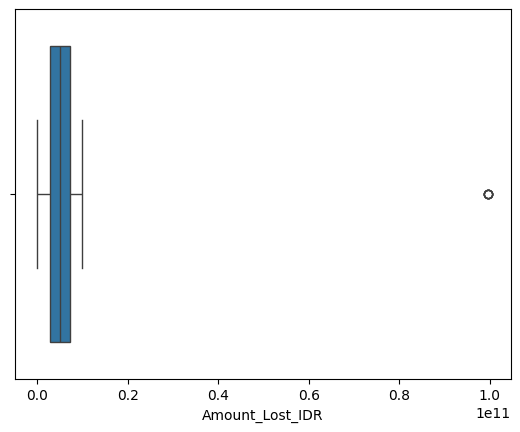

In [37]:
sns.boxplot(x = df_clean['Amount_Lost_IDR'])

-4193766249.5 14211368846.5


<Axes: xlabel='Amount_Lost_IDR'>

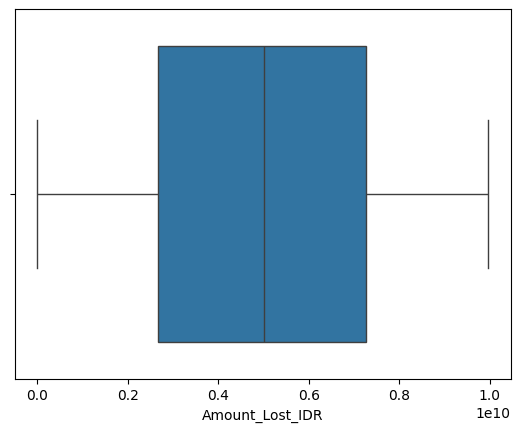

In [ ]:
q1 = df_clean['Amount_Lost_IDR'].quantile(0.25)
q3 = df_clean['Amount_Lost_IDR'].quantile(0.75)
iqr = q3 - q1

lowerBound = q1 - 1.5 * iqr
upperBound = q3 + 1.5 * iqr
print(lowerBound, upperBound)

df_outlier = df_clean[(df_clean['Amount_Lost_IDR'] < lowerBound) | df_clean['Amount_Lost_IDR'] > upperBound]

df_clean = df_clean[(df_clean['Amount_Lost_IDR'] >= lowerBound) & (df_clean['Amount_Lost_IDR'] <= upperBound)]

sns.boxplot(x=df_clean['Amount_Lost_IDR'])

In [46]:
from sklearn.preprocessing import OneHotEncoder

In [47]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
df_ohe = ohe.fit_transform(df_clean[['Verdict']])
df_ohe

,Verdict_Guilty,Verdict_Not Guilty,Verdict_Ongoing
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,1.0,0.0,0.0
...,...,...,...
995,1.0,0.0,0.0
996,0.0,1.0,0.0
997,0.0,0.0,1.0
998,1.0,0.0,0.0


In [48]:
df_encode = pd.concat([df_clean, df_ohe], axis=1).drop(columns=['Verdict'], axis=1)
df_encode

,Case_ID,Year,Province,Amount_Lost_IDR,Defendants,Verdict_Guilty,Verdict_Not Guilty,Verdict_Ongoing
0,1,2006,Sumatra,7545693324.0,4.0,1.0,0.0,0.0
1,2,2019,Sumatra,1112057931.0,7.0,0.0,1.0,0.0
2,3,2014,Kalimantan,9420433921.0,4.0,1.0,0.0,0.0
3,4,2010,Sulawesi,5697988826.0,2.0,0.0,1.0,0.0
4,5,2007,East Java,2405513000.0,4.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
995,996,2024,Bali,5005706455.0,5.0,1.0,0.0,0.0
996,997,2000,Sumatra,5005706455.0,5.0,0.0,1.0,0.0
997,998,2020,Kalimantan,5005706455.0,5.0,0.0,0.0,1.0
998,999,2021,Kalimantan,5005706455.0,5.0,1.0,0.0,0.0


In [49]:
df_encode['Amount_Lost_IDR_per_Defendant'] = df_encode['Amount_Lost_IDR'] / df_encode['Defendants']
df_encode

,Case_ID,Year,Province,Amount_Lost_IDR,Defendants,Verdict_Guilty,Verdict_Not Guilty,Verdict_Ongoing,Amount_Lost_IDR_per_Defendant
0,1,2006,Sumatra,7545693324.0,4.0,1.0,0.0,0.0,1886423331.0
1,2,2019,Sumatra,1112057931.0,7.0,0.0,1.0,0.0,158865418.714286
2,3,2014,Kalimantan,9420433921.0,4.0,1.0,0.0,0.0,2355108480.25
3,4,2010,Sulawesi,5697988826.0,2.0,0.0,1.0,0.0,2848994413.0
4,5,2007,East Java,2405513000.0,4.0,1.0,0.0,0.0,601378250.0
...,...,...,...,...,...,...,...,...,...
995,996,2024,Bali,5005706455.0,5.0,1.0,0.0,0.0,1001141291.0
996,997,2000,Sumatra,5005706455.0,5.0,0.0,1.0,0.0,1001141291.0
997,998,2020,Kalimantan,5005706455.0,5.0,0.0,0.0,1.0,1001141291.0
998,999,2021,Kalimantan,5005706455.0,5.0,1.0,0.0,0.0,1001141291.0


In [50]:
df_norm = df_encode.drop(columns=['Province', 'Year', 'Case_ID'], axis=1)
df_norm

,Amount_Lost_IDR,Defendants,Verdict_Guilty,Verdict_Not Guilty,Verdict_Ongoing,Amount_Lost_IDR_per_Defendant
0,7545693324.0,4.0,1.0,0.0,0.0,1886423331.0
1,1112057931.0,7.0,0.0,1.0,0.0,158865418.714286
2,9420433921.0,4.0,1.0,0.0,0.0,2355108480.25
3,5697988826.0,2.0,0.0,1.0,0.0,2848994413.0
4,2405513000.0,4.0,1.0,0.0,0.0,601378250.0
...,...,...,...,...,...,...
995,5005706455.0,5.0,1.0,0.0,0.0,1001141291.0
996,5005706455.0,5.0,0.0,1.0,0.0,1001141291.0
997,5005706455.0,5.0,0.0,0.0,1.0,1001141291.0
998,5005706455.0,5.0,1.0,0.0,0.0,1001141291.0


In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df_norm)
df_scaled = pd.DataFrame(df_scaled, columns=df_norm.columns)
df_scaled

,Amount_Lost_IDR,Defendants,Verdict_Guilty,Verdict_Not Guilty,Verdict_Ongoing,Amount_Lost_IDR_per_Defendant
0,0.757105,0.375,1.0,0.0,0.0,0.193302
1,0.111331,0.750,0.0,1.0,0.0,0.016240
2,0.945281,0.375,1.0,0.0,0.0,0.241339
3,0.571642,0.125,0.0,1.0,0.0,0.291958
4,0.241161,0.375,1.0,0.0,0.0,0.061594
...,...,...,...,...,...,...
990,0.502155,0.500,1.0,0.0,0.0,0.102567
991,0.502155,0.500,0.0,1.0,0.0,0.102567
992,0.502155,0.500,0.0,0.0,1.0,0.102567
993,0.502155,0.500,1.0,0.0,0.0,0.102567


In [53]:
df_scaled.describe()

,Amount_Lost_IDR,Defendants,Verdict_Guilty,Verdict_Not Guilty,Verdict_Ongoing,Amount_Lost_IDR_per_Defendant
count,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000
mean,0.496555,0.502638,0.313568,0.336683,0.349749,0.156292
std,0.279623,0.314307,0.464176,0.472813,0.477130,0.179222
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.267834,0.250000,0.000000,0.000000,0.000000,0.050414
50%,0.502155,0.500000,0.000000,0.000000,0.000000,0.102567
75%,0.728012,0.750000,1.000000,1.000000,1.000000,0.173649
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0, 0.5, 'Frequency')

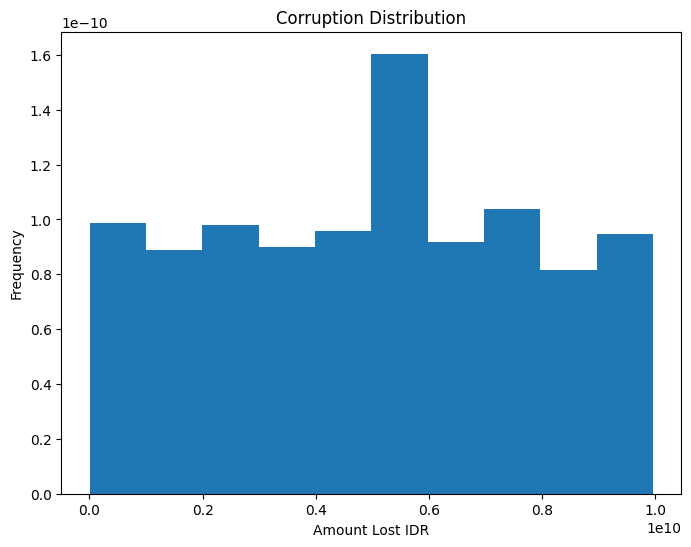

In [54]:
plt.figure(figsize=(8, 6))
plt.hist(df_encode['Amount_Lost_IDR'], density=True)
plt.title("Corruption Distribution")
plt.xlabel('Amount Lost IDR')
plt.ylabel('Frequency')

Text(0, 0.5, 'Amount Lost IDR')

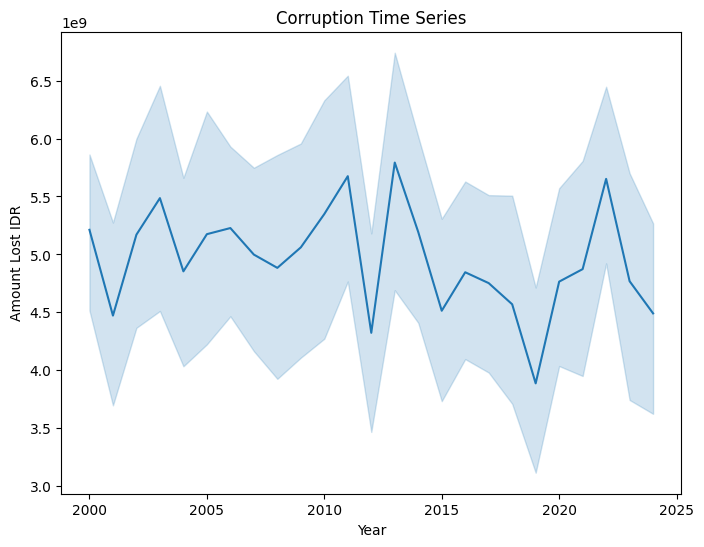

In [55]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=df_encode['Year'], y=df_encode['Amount_Lost_IDR'])
plt.title("Corruption Time Series")
plt.xlabel('Year')
plt.ylabel('Amount Lost IDR')